In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST(root='./data', train=True, download=False, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST(root='./data', train=False, download=False, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
X = torch.rand(28*28)
X = X.view(1, 28*28)

In [7]:
output = net(X)

In [8]:
output

tensor([[-2.2916, -2.2772, -2.4923, -2.2177, -2.4062, -2.2322, -2.2503, -2.2138,
         -2.2866, -2.3967]], grad_fn=<LogSoftmaxBackward0>)

In [10]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 5

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.1382, grad_fn=<NllLossBackward0>)
tensor(0.1048, grad_fn=<NllLossBackward0>)
tensor(0.0645, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


print("Accuracy: {:.2f}%".format(100 * correct / total))

Accuracy: 98.64%


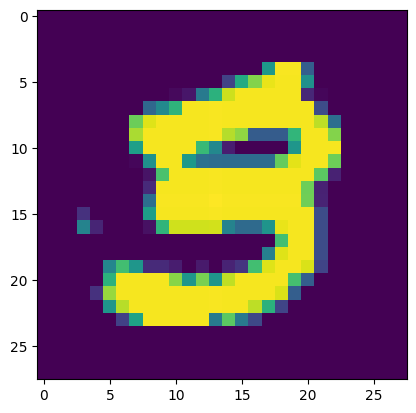

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X[8].view(28, 28))
plt.show()

In [27]:
print(torch.argmax(net(X[8].view(-1, 784))[0]))

tensor(3)
